In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
#installing dependencies
!apt-get -qq -y install libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

In [0]:
import sys
import pylab
import random
import numpy as np
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
#400번 반복해서 학습
EPISODES = 400

In [0]:
import gym
#gym.make('CartPole-v0') : Cart Pole 환경 설정
env = gym.make('CartPole-v0')

In [0]:
#env.reset() : Cart Pole 환경 초기화
obs = env.reset()
print('initial observation:', obs)

initial observation: [ 0.03274311  0.03388064  0.04342207 -0.0440624 ]


In [0]:
# 그래픽 출력 준비
from pyvirtualdisplay import Display
#Display(visible=0 (출력 안함 ), size=(1024 (이미지 가로), 768(이미지 세로)))
display = Display(visible=0, size=(1024, 768))
#이미지 출력 준비
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
#Cart Pole 게임의 각 장면의 이미지를 numpy 배열로 출력
#이미지는 rgb 값이 출력
env.render(mode = 'rgb_array')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [0]:
# DQN 하이퍼파라미터
weight = 0.99
epsilon = 1.0
epsilon_min = 0.01
batch_size = 32
train_start = 1000

In [0]:
# 리플레이 메모리, 최대 크기 2000
reply_buffer = deque(maxlen=2000)

In [0]:
#입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()
#model에 데이터 분석 객체를 추가

#Dense(24,input_dim=4, activation="relu",kernel_initializer='he_uniform')
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 hypothesis0 이고 칸의 수는 24이므로
#Dense(24)

#input_dim: 입력 데이터 칸의 수, 입력데이터는 observation이고 칸의 수는 4이므로 4

#Dense(24,input_dim=4) : 선형 회귀를 할 객체를 생성
                       #: 출력 칸수는 24  입력 칸수 4
    
# activation="relu" :선형 회귀 후 relu 함수를 활성 함수를 이용해서 0 이상의 값리턴
#kernel_initializer='he_uniform' : he uniform 계산을 이용해서 w0, b0 초기화
model.add(Dense(24, input_dim=4, activation='relu',kernel_initializer='he_uniform'))
#Dense(24,activation="relu",kernel_initializer='he_uniform')
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 hypothesis1 이고 출력칸의 수는 24이므로
#Dense(24)
# activation="relu" :선형 회귀 후 relu 함수를 활성 함수를 이용해서 0 이상의 값리턴
#kernel_initializer='he_uniform' : he uniform 계산을 이용해서 w1, b1 초기화
model.add(Dense(24, activation='relu',kernel_initializer='he_uniform'))
#출력데이터는 action이고 [1,0] : 왼쪽 혹은 [0,1] 오른쪽 이므로 출력데이터는 2칸
#Dense(24,activation="linear"",kernel_initializer='he_uniform')
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 hypothesis2 이고 출력칸의 수는 2이므로
#Dense(2)
# activation="linear" :선형 회귀 후 활성 함수를 사용하지 않고 입력xweight+b를 리턴
#kernel_initializer='he_uniform' : he uniform 계산을 이용해서 w1, b1 초기화
model.add(Dense(2, activation='linear',kernel_initializer='he_uniform'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


In [0]:
#GradientDecnet를 이용해서 w 를 찾는 방법을 설정함
#loss='mse' : #tf.reduce_sum(tf.square(Qs-predQ)): Qs(실제 Q) 와 predQ (예측한 Q) 의 차의 
#제곱이 최소가 되는 w를 찾음

#w값을 자동으로 수정하는 AdamOptimizer 객체를 생성
#optimizer=Adam(lr=0.001) : learning rate를 0.001로 설정
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [0]:
frameList=[]

In [0]:
import random as pr


for episode in range(EPISODES):
    done = False
    total_reward = 0
    # env 초기화
    observation = env.reset()
    #observation은 1차원 배열임 => observation 예 :[0.1, 0.3, 0.2,0.8]
    #Dense로 선형회귀를 계산하기 위해서는 2차원 배열이 필요함
    # np.reshape(observation, [1, 4]): observation을 1줄 4칸 2차원 배열로 변환
    #                                  observation 예 :[[0.1, 0.3, 0.2,0.8]]
    observation = np.reshape(observation, [1, 4])

    #done이 False일 동안 반복
    while not done:
        print("observation:",observation)
        #np.random.rand(1): 0이상 1미만의 난수를 1개 생성
        #이 값이 epsilon(초기값은 1.0) 보다 작으면
        if np.random.rand(1) <= epsilon:
            #랜덤하게 액션선택 0: 왼쪽  1:오른쪽
            action=pr.choice([0,1])
        else:
            #model.predict(observation): observation에 action을 예측해서 q_value에 리턴
            #q_value에 리턴되는 값은 one hot 인코딩 되서 2차원 배열로 리턴됨
            #model.predict() 이 왼쪽을 예측=> q_value[0]: [1,0] 
            #model.predict() 이 오른쪽을 예측=> q_value[0] :[0,1]
            q_value = model.predict(observation)
            #np.argmax(q_value[0]) : 의 최대 값이 저장된 인덱스 리턴
            #q_value[0]: [1,0] => action :0 (왼쪽)
            #q_value[0]: [0,1] => action :1 (오른쪽)
            action=np.argmax(q_value[0])
            

        print("action:",action)         
        # env.step(action) : action에 따라서 Cart를 왼쪽 오른쪽으로 이동
        next_observation, reward, done, info = env.step(action)
        print("next_observation:",next_observation)
        print("reward:",reward)
        print("done:",done)
        print("info:",info)
        next_observation = np.reshape(next_observation, [1, 4])
        # done이 True(카트가 쓰러짐) 이고
        #total_reward : reward의 합 (카트가 서있는 장면마다 reward 는 1 카트가 쓰러지면 reward는 0)
        #total_reward가 199 미만이면
        if done and total_reward < 199 :
            #reward 에 -100 을 입력해서 벌을줌
            reward=-100
        

        # 리플레이 메모리에 observation, action, reward, next_observation, done 추가
        reply_buffer.append((observation, action, reward, next_observation, done))

        
        # reply_buffer에 1000 개 이상의 (observation, action, reward, next_observation, done)
        #이 저장되 있으면 
        if len(reply_buffer) >= 1000:
            #epsilon 이 epsilon_min 보다 크면
            if epsilon > epsilon_min:
                #epsilon 을 0.0001 감소
                epsilon *= 0.999

            # 메모리에서 배치 크기(32개) 만큼 무작위로 샘플 추출
            mini_batch = random.sample(reply_buffer, batch_size)
            #np.zeros((batch_size, 4)) : batch_size : 32 줄 4칸의 0으로 초기화된 배열 생성
            states = np.zeros((batch_size, 4))
            #np.zeros((batch_size, 4)) : batch_size : 32 줄 4칸의 0으로 초기화된 배열 생성
            next_states = np.zeros((batch_size, 4))
            actions, rewards, dones = [], [], []
            #0~31 반복
            for i in range(batch_size):
                #mini_batch[i][0]:mini_batch i번째 줄 0번째 칸 :observation을 
                #배열 states에 대입
                states[i] = mini_batch[i][0]
                #mini_batch[i][1]:mini_batch i번째 줄 1번째 칸 :action을 
                #리스트 actions에 추가
                actions.append(mini_batch[i][1])
                #mini_batch[i][2]:mini_batch i번째 줄 2번째 칸 :reward을 
                #리스트 reward에 추가
                rewards.append(mini_batch[i][2])
                #mini_batch[i][3]:mini_batch i번째 줄 3번째 칸 :next_observation을 
                #배열 next_states에 대입
                next_states[i] = mini_batch[i][3]
                #mini_batch[i][4]:mini_batch i번째 줄 4번째 칸 :done을 
                #리스트 dones에 추가
                dones.append(mini_batch[i][4])

            # 현재 상태에 대한 모델의 큐함수
            #model.predict(states): 현재 상태 states 에 action을 예측해서  리턴
            #model.predict() 이 왼쪽을 예측=> q_value[0]: [1,0] 
            #model.predict() 이 오른쪽을 예측=> q_value[0] :[0,1]
            target = model.predict(states)
            # 다음 상태에 대한 모델의 큐함수
            #model.predict(next_states): 다음 상태 next_states 에 action을 예측해서  리턴
            #model.predict() 이 왼쪽을 예측=> q_value[0]: [1,0] 
            #model.predict() 이 오른쪽을 예측=> q_value[0] :[0,1]
            target_val = model.predict(next_states)

            
            for i in range(batch_size):
                #게임이 종료 되면
                if dones[i]:
                    #rewards[i] 를 대입 : 0 
                    target[i][actions[i]] = rewards[i]
                else:
                    #np.amax(target_val[i]): target_val[i] 의 최대값
                    #weight: 0.99
                    #reward :0 
                    target[i][actions[i]] = rewards[i] + weight * (np.amax(target_val[i]))
            #model에 입력값 state의 예측값 model.predict(states)
            #Q테이블 값 target[i][actions[i]] = rewards[i] + weight * (np.amax(target_val[i]))
            # 가 같도록 학습
            model.fit(states, target, batch_size=batch_size,
                        epochs=1, verbose=0)



        #reward의 값 계산
        total_reward += reward
        #next_observation으로 observation 업데이트
        observation = next_observation

        if done:
            #total_reward가 199 미만이면
            if total_reward<199:
                #total_reward+100 (199미만일때 앞에서 reward=-100 이므로)
                #total_reward는 카드가 얼마나 서있는지 알고자 하는것이기 때문에
                #reward=-100 했던것을 원래대로 복구
                total_reward=total_reward+100
            #frameList에 total_reward 추가
            frameList.append(total_reward)
            print("="*100)
            print("episode:",episode , ":total_reward:", total_reward)
            print("="*100)
                       
            

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
next_observation: [ 0.00057116 -0.00104159  0.00653057 -0.03813126]
reward: 1.0
done: False
info: {}
observation: [[ 0.00057116 -0.00104159  0.00653057 -0.03813126]]
action: 0
next_observation: [ 0.00055032 -0.19625657  0.00576794  0.25660495]
reward: 1.0
done: False
info: {}
observation: [[ 0.00055032 -0.19625657  0.00576794  0.25660495]]
action: 1
next_observation: [-0.00337481 -0.00121745  0.01090004 -0.03425311]
reward: 1.0
done: False
info: {}
observation: [[-0.00337481 -0.00121745  0.01090004 -0.03425311]]
action: 1
next_observation: [-0.00339916  0.19374651  0.01021498 -0.32347712]
reward: 1.0
done: False
info: {}
observation: [[-0.00339916  0.19374651  0.01021498 -0.32347712]]
action: 0
next_observation: [ 0.00047577 -0.00151939  0.00374544 -0.02759039]
reward: 1.0
done: False
info: {}
observation: [[ 0.00047577 -0.00151939  0.00374544 -0.02759039]]
action: 0
next_observation: [ 0.00044539 -0.19669486  0.00319363  0.2662719 ]
reward: 1.0
done

In [0]:
frameList

[11.0,
 32.0,
 24.0,
 13.0,
 34.0,
 17.0,
 12.0,
 16.0,
 26.0,
 27.0,
 9.0,
 16.0,
 19.0,
 20.0,
 15.0,
 11.0,
 16.0,
 10.0,
 11.0,
 15.0,
 22.0,
 29.0,
 11.0,
 29.0,
 24.0,
 68.0,
 20.0,
 18.0,
 12.0,
 14.0,
 21.0,
 41.0,
 19.0,
 20.0,
 14.0,
 29.0,
 13.0,
 23.0,
 29.0,
 12.0,
 43.0,
 13.0,
 32.0,
 20.0,
 19.0,
 10.0,
 33.0,
 30.0,
 21.0,
 17.0,
 10.0,
 58.0,
 9.0,
 14.0,
 13.0,
 14.0,
 29.0,
 10.0,
 22.0,
 11.0,
 23.0,
 21.0,
 11.0,
 13.0,
 9.0,
 58.0,
 37.0,
 20.0,
 63.0,
 53.0,
 31.0,
 45.0,
 43.0,
 195.0,
 51.0,
 32.0,
 44.0,
 49.0,
 44.0,
 60.0,
 44.0,
 147.0,
 109.0,
 61.0,
 66.0,
 69.0,
 125.0,
 200.0,
 194.0,
 106.0,
 110.0,
 56.0,
 200.0,
 120.0,
 90.0,
 200.0,
 88.0,
 200.0,
 143.0,
 125.0,
 134.0,
 97.0,
 15.0,
 15.0,
 11.0,
 15.0,
 15.0,
 102.0,
 37.0,
 23.0,
 28.0,
 26.0,
 85.0,
 200.0,
 141.0,
 181.0,
 12.0,
 13.0,
 124.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 169.0,
 153.0,
 155.0,
 151.0,
 152.0,
 155.0,
 171.0,
 148.0

In [0]:
#animationFrame: Cart Pole 게임의 각 장면의 이미지의 RGB 값을 저장할 리스트
animationFrame = []

#env.reset() : 게임을 재시작
observation=env.reset()   
#env.render(mode = 'rgb_array') :Cart Pole 게임의 각 장면의 이미지를 numpy 배열로 출력
#                                이미지는 rgb 값이 출력

#animationFrame.append : 이미지를 animationFrame에 추가
animationFrame.append(env.render(mode = 'rgb_array'))
#200 번 반복해서 게임 진행 
for frame in range(200):
    print("="*100) 
    print("frame:",frame)
    print("="*100) 
    observation = np.reshape(observation, [1, 4])
    Q=model.predict(observation)
    #np.amax(Q[state_0]) :  Q 테이블 state_0 인덱스의 최대값이 리턴됨
    #최대값을 변수 m에 저장
    #np.argmax(Q[state_0]): Q[state_0] 의 최대값을 리턴
    action=np.argmax(Q)

    print("action:",action) 

    #env.step(action): Cart Pole을 action 방향으로 이동
    observation, reward, done, info = env.step(action)
    print("observation:",observation)
    print("reward:",reward)
    print("done:",done)
    print("info:",info)
    #done이 True면 게임 종료
    if done==True:
        break;

    #env.render(mode = 'rgb_array') :Cart Pole 게임의 각 장면의 이미지를 numpy 배열로 출력
    #                                이미지는 rgb 값이 출력

    #animationFrame.append : 이미지를 animationFrame에 추가
    animationFrame.append(env.render(mode = 'rgb_array'))
print("="*100)    
    

frame: 0
action: 0
observation: [-0.0258108  -0.15832738 -0.01936011  0.30848761]
reward: 1.0
done: False
info: {}
frame: 1
action: 1
observation: [-0.02897735  0.037065   -0.01319036  0.00976245]
reward: 1.0
done: False
info: {}
frame: 2
action: 0
observation: [-0.02823605 -0.15786532 -0.01299511  0.29825464]
reward: 1.0
done: False
info: {}
frame: 3
action: 1
observation: [-0.03139335  0.03743944 -0.00703002  0.00150179]
reward: 1.0
done: False
info: {}
frame: 4
action: 0
observation: [-0.03064456 -0.15758099 -0.00699998  0.29195839]
reward: 1.0
done: False
info: {}
frame: 5
action: 1
observation: [-0.03379618  0.03764006 -0.00116082 -0.002924  ]
reward: 1.0
done: False
info: {}
frame: 6
action: 1
observation: [-0.03304338  0.23277864 -0.0012193  -0.29597295]
reward: 1.0
done: False
info: {}
frame: 7
action: 0
observation: [-0.02838781  0.0376741  -0.00713876 -0.00367482]
reward: 1.0
done: False
info: {}
frame: 8
action: 0
observation: [-0.02763433 -0.15734475 -0.00721225  0.28674722

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

In [0]:
#animationFrame 에 저장된 이미지의 개수 조회
len(animationFrame)

200

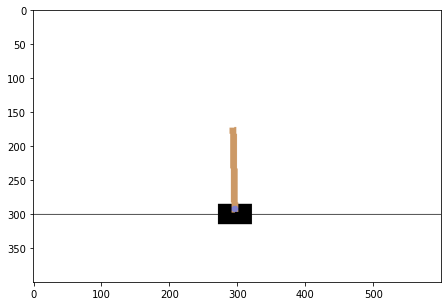

In [0]:
#이미지의 가로 크기를 8  세로 크기를 5로  설정
#plt.figure(figsize=(이미지 가로, 이미지 세로)) : 
plt.figure(figsize=(8, 5))
#animationFrame[0] : Cart Pole 게임의 첫번째 이미지의 RGB 배열
#plt.imshow(animationFrame[0]) : Cart Pole 게임의 첫번째 이미지를 그림으로 변환해서 patch에 대입
patch = plt.imshow(animationFrame[0])

#애니메이션 진행할때 마다 호출하는 함수 애니메이션의 각 장면을 출력
def animate(index):
    #pach의 이미지를 바꿈
    #animationFrame[index] : animationFrame 의 index 번째 이미지로 바꿈
    patch.set_data(animationFrame[index])

#plt.gcf() : 이미지를 그릴 객체
#animate : 애니메이션을 그리기 위해서 호출하는 함수 애니메이션의 각 화면을 리턴
#len(animationFrame): animationFrame 에 저장된 이미지의 개수
#interval = 50 : 0.5초 마다 animate 함수를 호출해서 애니메시션 실행

#애니메이션을 실행 할 객체
#matplotlib.animation.FuncAnimation(애니메이션을 실행할 객체,애니메이션의 각 장면을 리턴할 함수, 
#             frames=애니매이션에서 그릴 이미지 개수, 
#             interval = 애니메이션 각 장면을 리턴할 함수를 호출하는 시간 (단위 1/1000 ))
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(animationFrame), interval = 100)



In [0]:
#ani.to_jshtml() : 애니메니션을 실행하고 각 결과를 html태그로 변환해서 리턴
#HTML() : 애니메이션을 화면에 출력
HTML(ani.to_jshtml())